#### Here we run benchmark causal discovery algorithms on the big ER graph and connectome graph.

In [1]:
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.datasets import DAG, IIDSimulation
from castle.algorithms import Notears

2024-06-01 01:22:53,019 - /users-2/amine/miniconda3/envs/pcax24/lib/python3.10/site-packages/castle/backend/__init__.py[line:36] - INFO: You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
2024-06-01 01:22:53,123 - /users-2/amine/miniconda3/envs/pcax24/lib/python3.10/site-packages/castle/algorithms/__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


In [2]:
# load the weighted adjacency matrices for ER and connectome
import numpy as np
import os
import seaborn as sns

# Function to load the adjacency matrix
def load_adjacency_matrix(file_name):
    adj_matrix = np.load(file_name)
    print(f"Adjacency matrix loaded from {file_name}")
    return adj_matrix

# Specify the folder where the adjacency matrices were saved
folder = './data/'

# Example usage to load the saved adjacency matrices
G_A_init_t_ordered_adj_matrix = load_adjacency_matrix(os.path.join(folder, 'G_A_init_t_ordered_adj_matrix.npy'))
G_A_init_t_ordered_dag_adj_matrix = load_adjacency_matrix(os.path.join(folder, 'G_A_init_t_ordered_dag_adj_matrix.npy'))
ER_adj_matrix = load_adjacency_matrix(os.path.join(folder, 'ER_adj_matrix.npy'))
ER_dag_adj_matrix = load_adjacency_matrix(os.path.join(folder, 'ER_dag_adj_matrix.npy'))

Adjacency matrix loaded from ./data/G_A_init_t_ordered_adj_matrix.npy
Adjacency matrix loaded from ./data/G_A_init_t_ordered_dag_adj_matrix.npy
Adjacency matrix loaded from ./data/ER_adj_matrix.npy
Adjacency matrix loaded from ./data/ER_dag_adj_matrix.npy


In [ ]:
# simulate data for notears
dataset = IIDSimulation(W=ER_adj_matrix, n=2000, method='linear', sem_type='gauss')
true_dag, X = dataset.B, dataset.X

# notears learn
nt = Notears()
nt.learn(X)

# plot est_dag and true_dag
GraphDAG(nt.causal_matrix, true_dag)

# calculate accuracy
met = MetricsDAG(nt.causal_matrix, true_dag)
print(met.metrics)

In [ ]:
# simulate data for notears
dataset = IIDSimulation(W=G_A_init_t_ordered_dag_adj_matrix, n=2000, method='linear', sem_type='gauss')
true_dag, X = dataset.B, dataset.X

# notears learn
nt = Notears()
nt.learn(X)

# plot est_dag and true_dag
GraphDAG(nt.causal_matrix, true_dag)

# calculate accuracy
met = MetricsDAG(nt.causal_matrix, true_dag)
print(met.metrics)

In [3]:
# show unique values in the dag adjacency matrices
print("The unique values in the ER adjacency matrix are: ", np.unique(ER_adj_matrix))
print()
print("The unique values in the ER DAG adjacency matrix are: ", np.unique(ER_dag_adj_matrix))

The unique values in the ER adjacency matrix are:  [0. 1.]

The unique values in the ER DAG adjacency matrix are:  [0. 1.]


Properties of ER DAG graph:
Number of nodes: 279
Number of edges: 1560
Average degree: 11.18
Is DAG: True
Density: 0.0201
Average clustering coefficient: 0.0352


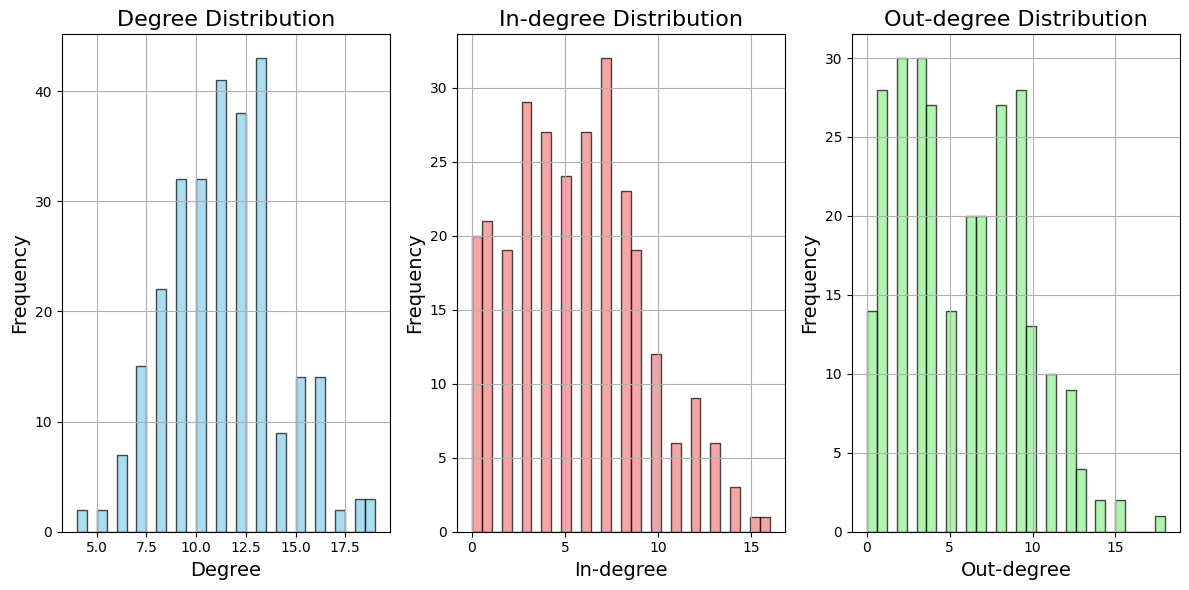


Properties of G_A_init_t_ordered DAG graph:
Number of nodes: 279
Number of edges: 1602
Average degree: 11.48
Is DAG: True
Density: 0.0207
Average clustering coefficient: 0.2731


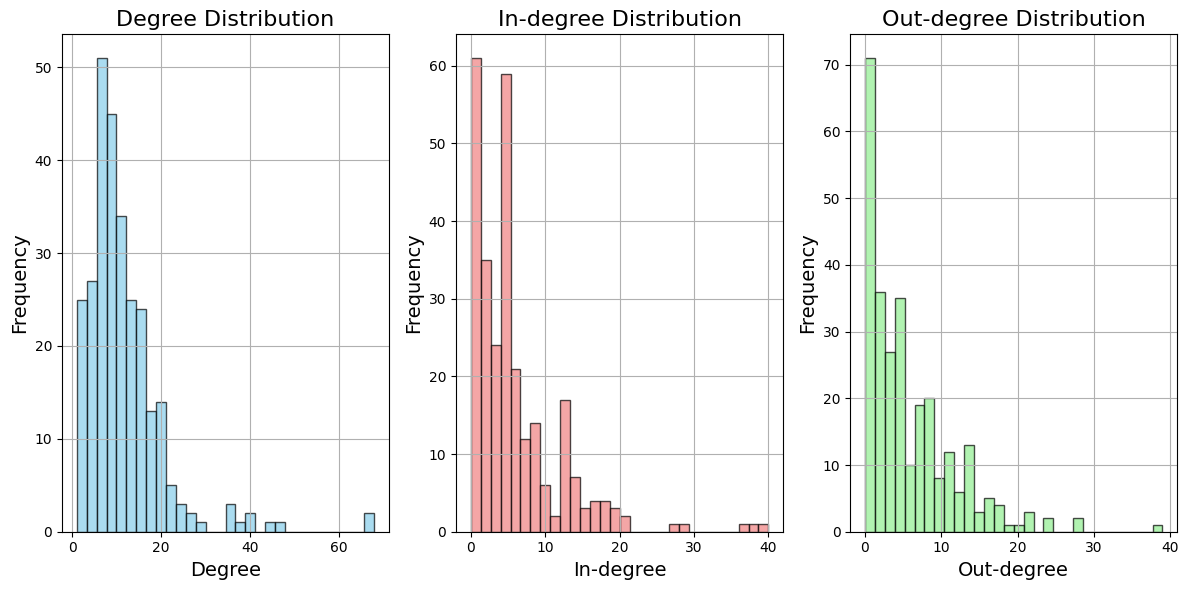

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def adjacency_matrix_to_graph(adj_matrix):
    # Convert the adjacency matrix to a NetworkX graph
    G = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)
    return G

def inspect_graph_properties(G):
    # Number of nodes and edges
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    
    # Average degree
    avg_degree = sum(dict(G.degree()).values()) / num_nodes
    
    # Degree distribution
    degrees = [d for n, d in G.degree()]
    in_degrees = [d for n, d in G.in_degree()]
    out_degrees = [d for n, d in G.out_degree()]
    
    # Check if the graph is a DAG
    is_dag = nx.is_directed_acyclic_graph(G)
    
    # Calculate the density of the graph
    density = nx.density(G)
    
    # Calculate the clustering coefficient
    """
    The clustering coefficient C(v) measures the local density of a node v's neighborhood by 
    comparing the actual number of edges among the neighbors of v to the maximum possible 
    number of edges (k_v*(k_v-1)) for a node with degree k_v in an undirected graph.
    In that sense C(v) is a measure of the cliquishness of the neighborhood of node v.
    For C(v) close to 0, the neighborhood of v is a sparse, disconnected set of nodes.
    For C(v) close to 1, the neighborhood of v is a clique of size k_v (i.e., a complete graph).
    """
    clustering_coefficient = nx.average_clustering(G.to_undirected())
    
    # Print properties
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {num_edges}")
    print(f"Average degree: {avg_degree:.2f}")
    print(f"Is DAG: {is_dag}")
    print(f"Density: {density:.4f}")
    print(f"Average clustering coefficient: {clustering_coefficient:.4f}")
    
    # Plot degree distributions
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.hist(degrees, bins=30, color='skyblue', edgecolor='k', alpha=0.7)
    plt.xlabel('Degree', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Degree Distribution', fontsize=16)
    plt.grid(True)
    
    plt.subplot(1, 3, 2)
    plt.hist(in_degrees, bins=30, color='lightcoral', edgecolor='k', alpha=0.7)
    plt.xlabel('In-degree', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('In-degree Distribution', fontsize=16)
    plt.grid(True)
    
    plt.subplot(1, 3, 3)
    plt.hist(out_degrees, bins=30, color='lightgreen', edgecolor='k', alpha=0.7)
    plt.xlabel('Out-degree', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Out-degree Distribution', fontsize=16)
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Convert the adjacency matrices of ER_dag_adj_matrix and and G_A_init_t_ordered_dag_adj_matrix to graphs
ER_dag_graph = adjacency_matrix_to_graph(ER_dag_adj_matrix)
G_A_init_t_ordered_dag_graph = adjacency_matrix_to_graph(G_A_init_t_ordered_dag_adj_matrix)

# Inspect properties of the graphs
print("Properties of ER DAG graph:")
inspect_graph_properties(ER_dag_graph)
print()
print("Properties of G_A_init_t_ordered DAG graph:")
inspect_graph_properties(G_A_init_t_ordered_dag_graph)

Properties of ER graph:
Number of nodes: 279
Number of edges: 2185
Average degree: 15.66
Is DAG: False
Density: 0.0282
Average clustering coefficient: 0.0506


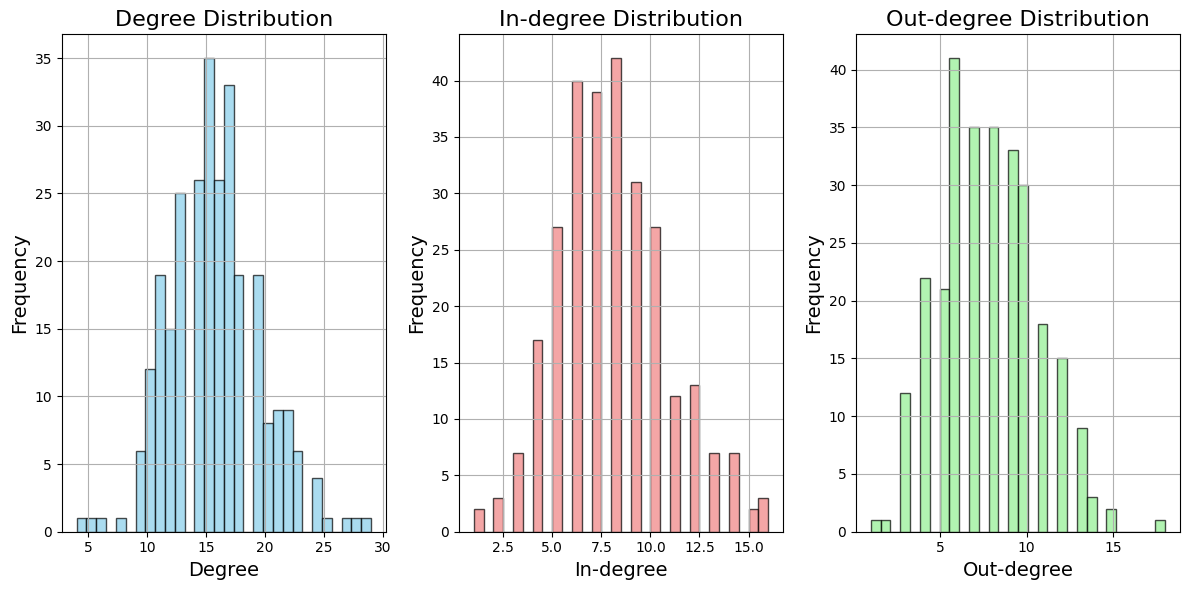


Properties of G_A_init_t_ordered graph:
Number of nodes: 279
Number of edges: 2194
Average degree: 15.73
Is DAG: False
Density: 0.0283
Average clustering coefficient: 0.3203


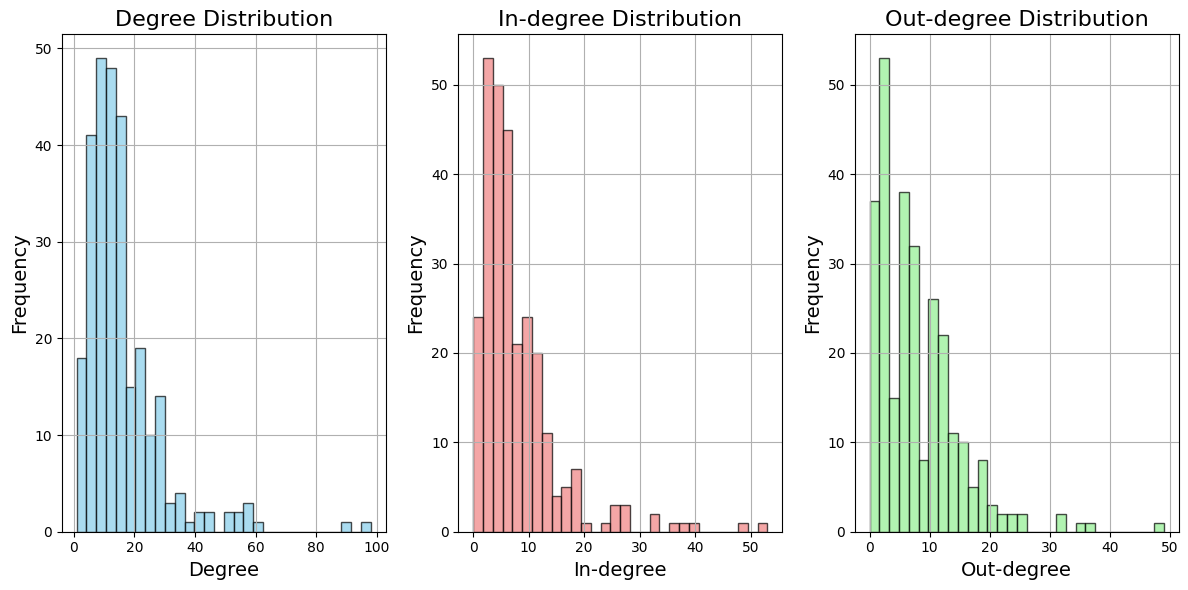

In [5]:
# Convert the adjacency matrices of ER_adj_matrix and G_A_init_t_ordered_adj_matrix to graphs
ER_graph = adjacency_matrix_to_graph(ER_adj_matrix)
G_A_init_t_ordered_graph = adjacency_matrix_to_graph(G_A_init_t_ordered_adj_matrix)

# Inspect properties of the graphs
print("Properties of ER graph:")
inspect_graph_properties(ER_graph)
print()
print("Properties of G_A_init_t_ordered graph:")
inspect_graph_properties(G_A_init_t_ordered_graph)

In [6]:
# show unique values in ER_dag_adj_matrix and G_A_init_t_ordered_dag_adj_matrix
print("Unique values in ER_dag_adj_matrix:", np.unique(ER_dag_adj_matrix))
print()
print("Unique values in G_A_init_t_ordered_dag_adj_matrix:", np.unique(G_A_init_t_ordered_dag_adj_matrix))
print()
# now ER_adj_matrix and G_A_init_t_ordered_adj_matrix
print("Unique values in ER_adj_matrix:", np.unique(ER_adj_matrix))
print()
print("Unique values in G_A_init_t_ordered_adj_matrix:", np.unique(G_A_init_t_ordered_adj_matrix))

Unique values in ER_dag_adj_matrix: [0. 1.]

Unique values in G_A_init_t_ordered_dag_adj_matrix: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 23. 24. 25. 26. 27. 30. 35. 37.]

Unique values in ER_adj_matrix: [0. 1.]

Unique values in G_A_init_t_ordered_adj_matrix: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 23. 24. 25. 26. 27. 30. 35. 37.]


In [7]:
def plot_adjacency_matrix(adj_matrix, title="Adjacency Matrix"):
    plt.figure(figsize=(10, 8))
    sns.heatmap(adj_matrix, cmap='viridis', cbar=True)
    plt.title(title)
    plt.xlabel('Node')
    plt.ylabel('Node')
    plt.show()

In [8]:
# Example usage
folder = './data/'
G_A_init_t_ordered_adj_matrix_binary = np.load(os.path.join(folder, 'G_A_init_t_ordered_adj_matrix_binary.npy'))
G_A_init_t_ordered_dag_adj_matrix_binary = np.load(os.path.join(folder, 'G_A_init_t_ordered_dag_adj_matrix_binary.npy'))

# show unique values in G_A_init_t_ordered_adj_matrix_binary and G_A_init_t_ordered_dag_adj_matrix_binary
print("Unique values in G_A_init_t_ordered_adj_matrix_binary:", np.unique(G_A_init_t_ordered_adj_matrix_binary))
print()
print("Unique values in G_A_init_t_ordered_dag_adj_matrix_binary:", np.unique(G_A_init_t_ordered_dag_adj_matrix_binary))

Unique values in G_A_init_t_ordered_adj_matrix_binary: [0. 1.]

Unique values in G_A_init_t_ordered_dag_adj_matrix_binary: [0. 1.]


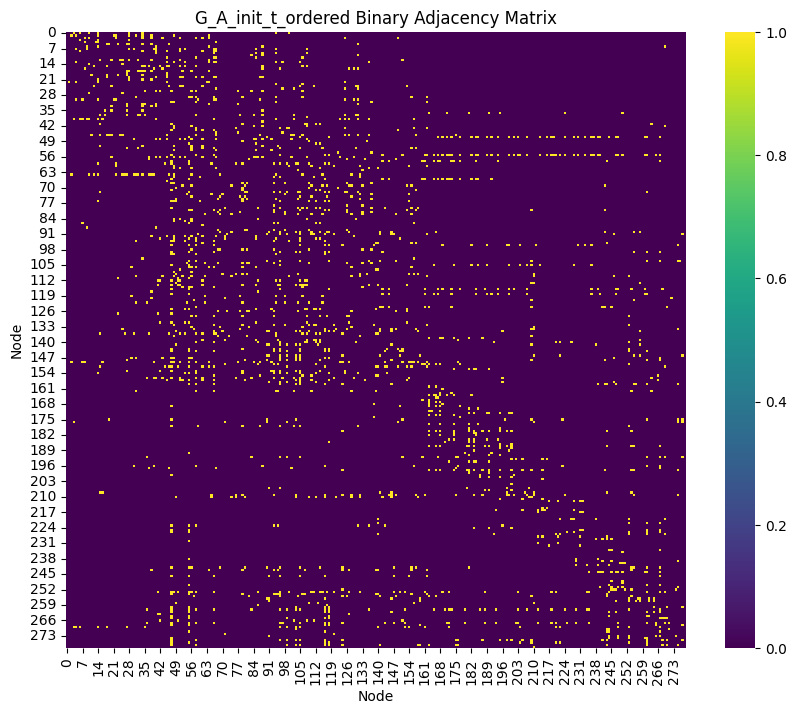

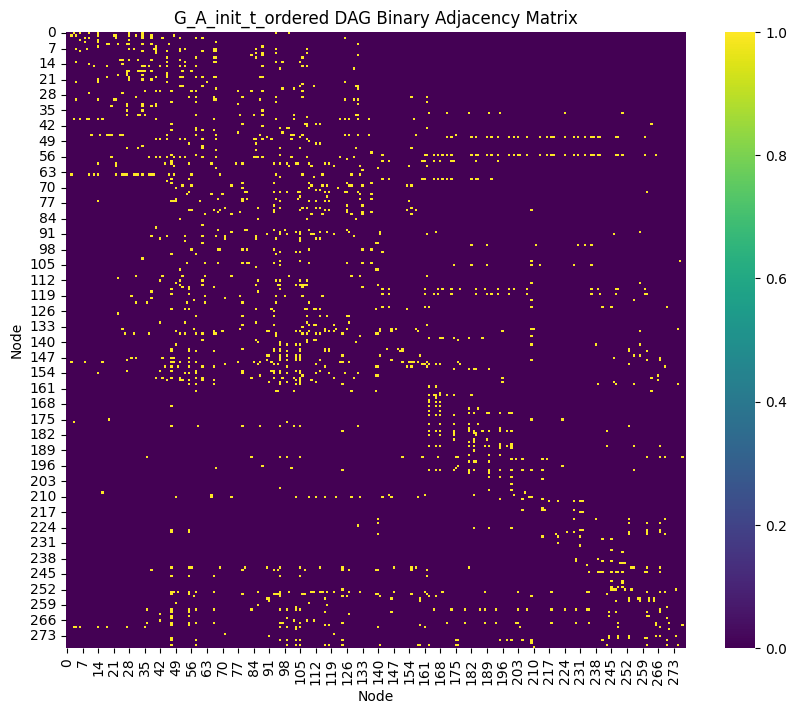

In [9]:
plot_adjacency_matrix(G_A_init_t_ordered_adj_matrix_binary, title="G_A_init_t_ordered Binary Adjacency Matrix")
print()
plot_adjacency_matrix(G_A_init_t_ordered_dag_adj_matrix_binary, title="G_A_init_t_ordered DAG Binary Adjacency Matrix")

In [10]:
# now load the binary upper triangular DAG adjacency matrices for ER and connectome: ER_dag_upper_triangular_binary and G_A_init_t_ordered_dag_upper_triangular_binary
ER_dag_upper_triangular_binary = np.load(os.path.join(folder, 'ER_dag_upper_triangular_binary.npy'))
G_A_init_t_ordered_dag_upper_triangular_binary = np.load(os.path.join(folder, 'G_A_init_t_ordered_dag_upper_triangular_binary.npy'))

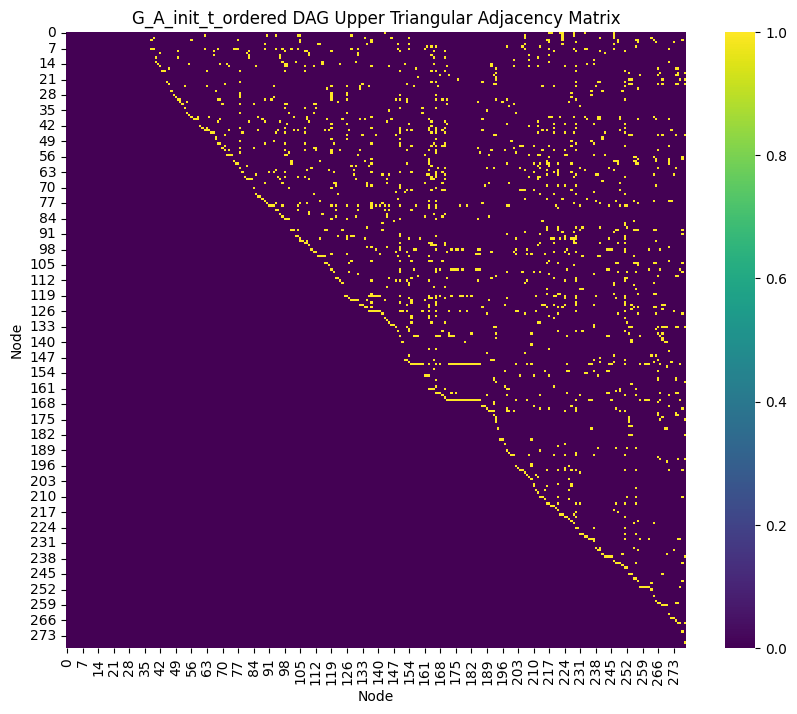

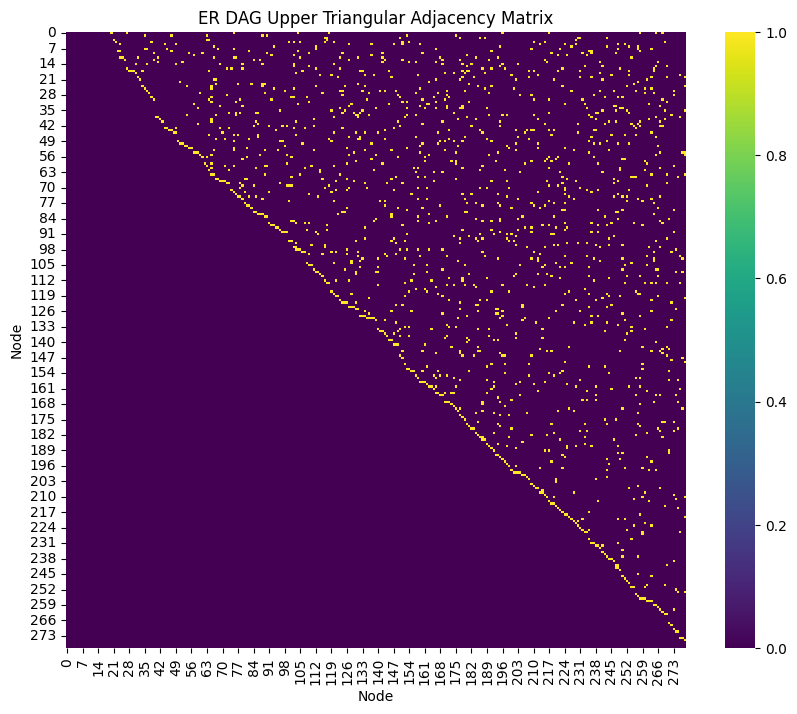

In [11]:
# now plot the permuted DAG adjacency matrices of G_A_init_t_ordered_dag_upper_triangular and ER_dag_upper_triangular
plot_adjacency_matrix(G_A_init_t_ordered_dag_upper_triangular_binary, title="G_A_init_t_ordered DAG Upper Triangular Adjacency Matrix")
print()
plot_adjacency_matrix(ER_dag_upper_triangular_binary, title="ER DAG Upper Triangular Adjacency Matrix")